In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import hist
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from utils import data_prep

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# Load data, converting columns types for convenience, labeling NAs
df = data_prep.load_and_prep_data("data/ncdatachallenge-2021-v1.csv")

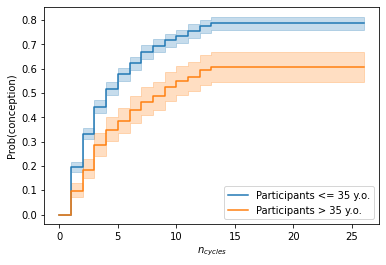

In [5]:
fig = data_prep.compare_km_cumulatives(df[df["age"] <= 35], df[df["age"] > 35], "Participants <= 35 y.o.", "Participants > 35 y.o.")

In [6]:
df[df["average_cycle_length"].isnull()]

,bmi,age,country,been_pregnant_before,education,sleeping_pattern,n_cycles_trying,outcome,dedication,average_cycle_length,cycle_length_std,regular_cycle,intercourse_frequency,pregnant
638,20.069204,32,GB,"No, never",Unreported,Unreported,1,pregnant,0.500000,NaN,NaN,True,0.035714,True
856,34.945324,30,GB,Unreported,Unreported,Unreported,2,not_pregnant,0.006667,NaN,NaN,True,0.000000,False
1477,22.582709,28,SE,"No, never",Unreported,Unreported,1,not_pregnant,0.034483,NaN,NaN,True,0.000000,False
1479,26.577734,28,GB,"No, never",University,Unreported,1,pregnant,0.551724,NaN,NaN,True,0.206897,True
1546,18.906901,25,SE,"No, never",High school,Wake same every workday,1,not_pregnant,0.266667,NaN,NaN,True,0.100000,False
1911,23.039758,27,GB,Unreported,University,Unreported,1,not_pregnant,0.055556,NaN,NaN,True,0.055556,False


In [7]:
dfcl = df[df["cycle_length_std"].notna() & (df["cycle_length_std"] > 0)]

(array([1.592e+03, 2.610e+02, 7.200e+01, 1.600e+01, 6.000e+00, 5.000e+00,
        4.000e+00, 3.000e+00, 1.000e+00, 3.000e+00]),
 array([0.01608682, 0.16820496, 0.3203231 , 0.47244123, 0.62455937,
        0.77667751, 0.92879565, 1.08091378, 1.23303192, 1.38515006,
        1.5372682 ]),
 <BarContainer object of 10 artists>)

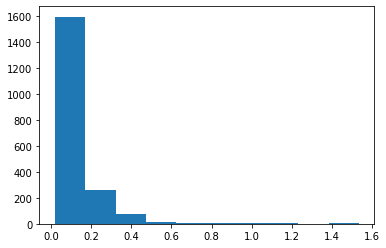

In [9]:
dfcl[dfcl["cycle_length_std"] > dfcl["average_cycle_length"]]

,bmi,age,country,been_pregnant_before,education,sleeping_pattern,n_cycles_trying,outcome,dedication,average_cycle_length,cycle_length_std,regular_cycle,intercourse_frequency,pregnant
207,22.229062,31,SE,"No, never",University,Wake same every workday,1,not_pregnant,0.000000,42.928571,46.778470,False,0.000000,False
1095,23.030045,34,SE,"No, never",High school,Unreported,4,not_pregnant,0.000000,57.875000,88.969397,False,0.000000,False
1227,20.415225,32,GB,Unreported,PhD,Shift worker,1,not_pregnant,0.000000,63.750000,93.077157,False,0.000000,False
1300,20.936639,31,GB,"No, never",University,Wake same every day,6,not_pregnant,0.858369,80.333333,117.825082,False,0.081545,False
1521,23.888441,31,FI,"No, never",University,Unreported,1,not_pregnant,0.444444,145.500000,168.998521,False,0.037037,False
1555,20.195578,32,SE,"No, never",University,Unreported,1,not_pregnant,0.000000,126.000000,156.751396,False,0.000000,False
1586,27.290694,30,US,"Yes, once",University,Unreported,1,not_pregnant,0.266667,79.500000,95.671312,False,0.000000,False
1993,21.453574,30,FI,"No, never",University,Wake same every workday,1,not_pregnant,0.000000,38.600000,41.126634,False,0.000000,False


In [10]:
df_ana = data_prep.prep_data_for_analysis(df)
df_ana["country"]
#df_ana = df_ana.drop(["country", "education", "sleeping_pattern"], axis=1)

0               SE
1       Unreported
2               SE
3               SE
4               SE
           ...    
1990            GB
1991            GB
1992            SE
1993         Other
1994            SE
Name: country, Length: 1995, dtype: category
Categories (5, object): ['SE', 'US', 'GB', 'Unreported', 'Other']

In [11]:
df_ana.loc[df["intercourse_frequency"] == 0., "intercourse_frequency"] = df["intercourse_frequency"].mean()

In [12]:
df_ana["been_pregnant_before"] = df_ana["been_pregnant_before"].cat.set_categories(["No, never", "Unreported", "Yes"])
df_ana.loc[df_ana["been_pregnant_before"].isna(), "been_pregnant_before"] = "Yes"

In [13]:
df_ana

,bmi,age,country,been_pregnant_before,education,sleeping_pattern,n_cycles_trying,dedication,average_cycle_length,cycle_length_std,regular_cycle,intercourse_frequency,pregnant
0,22.942130,31,SE,"No, never",University,Wake same every workday,1,0.640000,25.588235,2.526332,True,0.200000,True
1,19.886054,34,Unreported,Unreported,University,Unreported,7,0.009569,30.875000,3.522884,True,0.052632,True
2,29.323049,41,SE,"No, never",University,Several times during the night,4,0.298246,27.666667,2.503331,True,0.149123,False
3,24.386526,27,SE,"No, never",High school,Wake same every workday,2,0.895833,24.250000,3.453776,True,0.145833,True
4,29.299971,29,SE,"No, never",Trade/technical/vocational training,Wake same every day,2,0.666667,25.466667,0.990430,True,0.254902,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,24.867781,36,GB,Yes,PhD,Unreported,1,0.000000,30.250000,2.061553,True,0.106986,False
1991,21.616406,32,GB,"No, never",Unreported,Wake same every workday,2,0.843750,31.166667,2.483277,True,0.106986,True
1992,24.218750,23,SE,Unreported,High school,Wake same every workday,20,0.540187,26.629630,1.620735,True,0.050467,False
1993,21.453574,30,Other,"No, never",University,Wake same every workday,1,0.000000,38.600000,41.126634,False,0.106986,False


In [14]:
df_onehot = pd.get_dummies(df_ana.drop(["n_cycles_trying", "pregnant"], axis=1))
df_onehot

,bmi,age,dedication,average_cycle_length,cycle_length_std,regular_cycle,intercourse_frequency,country_SE,country_US,country_GB,...,education_PhD,education_Trade/technical/vocational training,education_University,education_Unreported,sleeping_pattern_Late and snoozer,sleeping_pattern_Several times during the night,sleeping_pattern_Shift worker,sleeping_pattern_Unreported,sleeping_pattern_Wake same every day,sleeping_pattern_Wake same every workday
0,22.942130,31,0.640000,25.588235,2.526332,True,0.200000,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,19.886054,34,0.009569,30.875000,3.522884,True,0.052632,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,29.323049,41,0.298246,27.666667,2.503331,True,0.149123,1,0,0,...,0,0,1,0,0,1,0,0,0,0
3,24.386526,27,0.895833,24.250000,3.453776,True,0.145833,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,29.299971,29,0.666667,25.466667,0.990430,True,0.254902,1,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,24.867781,36,0.000000,30.250000,2.061553,True,0.106986,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1991,21.616406,32,0.843750,31.166667,2.483277,True,0.106986,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1992,24.218750,23,0.540187,26.629630,1.620735,True,0.050467,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1993,21.453574,30,0.000000,38.600000,41.126634,False,0.106986,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [15]:
model = sm.Logit(df_ana["pregnant"], df_onehot.astype('float'))
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.570242
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               pregnant   No. Observations:                 1995
Model:                          Logit   Df Residuals:                     1971
Method:                           MLE   Df Model:                           23
Date:                Mon, 13 Nov 2023   Pseudo R-squ.:                  0.1635
Time:                        14:14:05   Log-Likelihood:                -1137.6
converged:                       True   LL-Null:                       -1360.0
Covariance Type:            nonrobust   LLR p-value:                 1.006e-79
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
bmi                                                -0.0023      0.010     -0.218      0.827      -0.023       0.018
age                                                -0.0433      0.014     -3.078      0.002      -0.071      -0.016
dedication                                          2.5511      0.178     14.307      0.000       2.202       2.901
average_cycle_length                                0.0142      0.014      1.039      0.299      -0.013       0.041
cycle_length_std                                   -0.0258      0.013     -2.043      0.041      -0.050      -0.001
regular_cycle                                       0.0798      0.151      0.529      0.597      -0.216       0.376
intercourse_frequency                               3.9906      0.689      5.795      0.000       2.641       5.340
country_SE                                          0.0065   5.79e+06   1.13e-09      1.000   -1.13e+07    1.13e+07
country_US                                         -0.1283   6.07e+06  -2.11e-08      1.000   -1.19e+07    1.19e+07
country_GB                                          0.1202   5.11e+06   2.35e-08      1.000      -1e+07       1e+07
country_Unreported                                 -0.4634   5.67e+06  -8.18e-08      1.000   -1.11e+07    1.11e+07
country_Other                                      -0.0482   5.46e+06  -8.83e-09      1.000   -1.07e+07    1.07e+07
been_pregnant_before_No, never                     -0.2419        nan        nan        nan         nan         nan
been_pregnant_before_Unreported                    -0.1577        nan        nan        nan         nan         nan
been_pregnant_before_Yes                           -0.1135        nan        nan        nan         nan         nan
education_Elementary school                         0.0153        nan        nan        nan         nan         nan
education_High school                              -0.2368        nan        nan        nan         nan         nan
education_PhD                                      -0.0650        nan        nan        nan         nan         nan
education_Trade/technical/vocational training      -0.1678        nan        nan        nan         nan         nan
education_University                                0.0374        nan        nan        nan         nan         nan
education_Unreported                               -0.0964        nan        nan        nan         nan         nan
sleeping_pattern_Late and snoozer                  -0.0746   7.57e+06  -9.85e-09      1.000   -1.48e+07    1.48e+07
sleeping_pattern_Several times during the night    -0.2230   7.57e+06  -2.95e-08      1.000   -1.48e+07    1.48e+07
sleeping_pattern_Shift worker                      -0.1241   7.57e+06  -1.64e-08      1.000   -1.48e+07    1.48e+07
sleeping_pattern_Unreported                         0.1311   7.57e+06   1.73e-08      1.000   -1.48e+07    1.

In [16]:
df_prune = df_ana.drop(["education", "sleeping_pattern",], axis=1)
df_prune_onehot = pd.get_dummies(df_prune.drop(["n_cycles_trying", "pregnant"], axis=1))
result_prune = sm.Logit(df_prune["pregnant"], df_prune_onehot.astype('float')).fit()
result_prune.summary()

Optimization terminated successfully.
         Current function value: 0.572587
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               pregnant   No. Observations:                 1995
Model:                          Logit   Df Residuals:                     1981
Method:                           MLE   Df Model:                           13
Date:                Mon, 13 Nov 2023   Pseudo R-squ.:                  0.1601
Time:                        14:14:12   Log-Likelihood:                -1142.3
converged:                       True   LL-Null:                       -1360.0
Covariance Type:            nonrobust   LLR p-value:                 7.141e-85
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
bmi                                -0.0042      0.010     -0.408      0.683      -0.024       0.016
age                                -0.0398      0.014     -2.927      0.003      -0.067      -0.013
dedication                          2.5006      0.170     14.677      0.000       2.167       2.835
average_cycle_length                0.0133      0.014      0.983      0.326      -0.013       0.040
cycle_length_std                   -0.0252      0.013     -2.007      0.045      -0.050      -0.001
regular_cycle                       0.0927      0.151      0.615      0.539      -0.203       0.388
intercourse_frequency               3.8835      0.684      5.681      0.000       2.544       5.223
country_SE                         -0.0340   4.93e+06   -6.9e-09      1.000   -9.67e+06    9.67e+06
country_US                         -0.1601   4.93e+06  -3.25e-08      1.000   -9.67e+06    9.67e+06
country_GB                          0.1022   4.93e+06   2.07e-08      1.000   -9.67e+06    9.67e+06
country_Unreported                 -0.4821   4.93e+06  -9.77e-08      1.000   -9.67e+06    9.67e+06
country_Other                      -0.0758   4.93e+06  -1.54e-08      1.000   -9.67e+06    9.67e+06
been_pregnant_before_No, never     -0.2759   4.93e+06  -5.59e-08      1.000   -9.67e+06    9.67e+06
been_pregnant_before_Unreported    -0.1701   4.93e+06  -3.45e-08      1.000   -9.67e+06    9.67e+06
been_pregnant_before_Yes           -0.2039   4.93e+06  -4.13e-08      1.000   -9.67e+06    9.67e+06
===================================================================================================
"""

In [17]:
df_prune_country = df_ana.drop(["education", "sleeping_pattern", "country"], axis=1)
df_prune_country_onehot = pd.get_dummies(df_prune_country.drop(["n_cycles_trying", "pregnant"], axis=1))
result_prune_country = sm.Logit(df_prune["pregnant"], df_prune_country_onehot.astype('float')).fit()
result_prune_country.summary()

Optimization terminated successfully.
         Current function value: 0.574440
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               pregnant   No. Observations:                 1995
Model:                          Logit   Df Residuals:                     1985
Method:                           MLE   Df Model:                            9
Date:                Mon, 13 Nov 2023   Pseudo R-squ.:                  0.1574
Time:                        14:14:32   Log-Likelihood:                -1146.0
converged:                       True   LL-Null:                       -1360.0
Covariance Type:            nonrobust   LLR p-value:                 1.403e-86
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
bmi                                -0.0047      0.010     -0.458      0.647      -0.025       0.015
age                                -0.0382      0.013     -2.901      0.004      -0.064      -0.012
dedication                          2.5012      0.169     14.769      0.000       2.169       2.833
average_cycle_length                0.0135      0.013      1.002      0.316      -0.013       0.040
cycle_length_std                   -0.0248      0.012     -1.980      0.048      -0.049      -0.000
regular_cycle                       0.0884      0.150      0.589      0.556      -0.206       0.382
intercourse_frequency               3.8308      0.682      5.613      0.000       2.493       5.168
been_pregnant_before_No, never     -0.3613      0.687     -0.526      0.599      -1.708       0.985
been_pregnant_before_Unreported    -0.2742      0.696     -0.394      0.694      -1.639       1.091
been_pregnant_before_Yes           -0.2949      0.707     -0.417      0.676      -1.680       1.090
===================================================================================================
"""

In [117]:
from sklearn.preprocessing import StandardScaler

df_prune_min = df_ana.drop(["education", "sleeping_pattern", "country", "been_pregnant_before", "regular_cycle"], axis=1)

cols_to_norm = ['age','bmi', "average_cycle_length", "dedication", "intercourse_frequency"]
df_prune_min[cols_to_norm] = StandardScaler().fit_transform(df_prune_min[cols_to_norm])

df_prune_min_onehot = pd.get_dummies(df_prune_min.drop(["n_cycles_trying", "pregnant"], axis=1))
df_prune_min_onehot_train = df_prune_min_onehot.iloc[:int(len(df_prune_min_onehot)*0.7),:]
df_prune_min_onehot_test = df_prune_min_onehot.iloc[int(len(df_prune_min_onehot)*0.7):,:]
df_prune_min_train = df_prune_min.iloc[:int(len(df_prune_min_onehot)*0.7),:]
df_prune_min_test = df_prune_min.iloc[int(len(df_prune_min_onehot)*0.7):,:]
result_prune_min = sm.Logit(df_prune_min_train["pregnant"], df_prune_min_onehot_train.astype('float')).fit()
result_prune_min.summary()

Optimization terminated successfully.
         Current function value: 0.592559
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               pregnant   No. Observations:                 1396
Model:                          Logit   Df Residuals:                     1390
Method:                           MLE   Df Model:                            5
Date:                Mon, 13 Nov 2023   Pseudo R-squ.:                  0.1258
Time:                        19:50:28   Log-Likelihood:                -827.21
converged:                       True   LL-Null:                       -946.20
Covariance Type:            nonrobust   LLR p-value:                 2.087e-49
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bmi                      -0.0270      0.059     -0.455      0.649      -0.143       0.089
age                      -0.1773      0.061     -2.901      0.004      -0.297      -0.058
dedication                0.8441      0.066     12.695      0.000       0.714       0.974
average_cycle_length     -0.2317      0.088     -2.627      0.009      -0.405      -0.059
cycle_length_std          0.0275      0.009      2.943      0.003       0.009       0.046
intercourse_frequency     0.2316      0.069      3.375      0.001       0.097       0.366
=========================================================================================
"""

In [41]:
df_ana.iloc[:int(1995*.7),:]

,bmi,age,country,been_pregnant_before,education,sleeping_pattern,n_cycles_trying,dedication,average_cycle_length,cycle_length_std,regular_cycle,intercourse_frequency,pregnant
0,22.942130,31,SE,"No, never",University,Wake same every workday,1,0.640000,25.588235,2.526332,True,0.200000,True
1,19.886054,34,Unreported,Unreported,University,Unreported,7,0.009569,30.875000,3.522884,True,0.052632,True
2,29.323049,41,SE,"No, never",University,Several times during the night,4,0.298246,27.666667,2.503331,True,0.149123,False
3,24.386526,27,SE,"No, never",High school,Wake same every workday,2,0.895833,24.250000,3.453776,True,0.145833,True
4,29.299971,29,SE,"No, never",Trade/technical/vocational training,Wake same every day,2,0.666667,25.466667,0.990430,True,0.254902,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,22.321429,23,US,"No, never",High school,Wake same every workday,3,0.000000,37.000000,6.595453,False,0.106986,True
1392,21.759436,36,GB,"No, never",University,Wake same every workday,13,0.666667,29.411765,2.739955,True,0.250000,True
1393,28.959000,35,SE,Yes,University,Late and snoozer,19,0.837573,27.259259,1.403090,True,0.015656,False
1394,22.322962,28,SE,Unreported,University,Wake same every workday,1,0.448276,30.500000,2.880972,True,0.068966,True


In [61]:
res = result_prune_min.predict(df_prune_min_onehot_test.astype('float')) > 0.5

In [76]:
len(df_prune_min_onehot_test)

599

In [77]:
len(df_prune_min_test)

599

In [72]:
from sklearn.metrics import (confusion_matrix,  
                           accuracy_score, ConfusionMatrixDisplay) 
  
# confusion matrix 
cm = confusion_matrix(df_prune_min_test["pregnant"].values, res)  

In [80]:
len(result_prune_min.resid_response)

1396

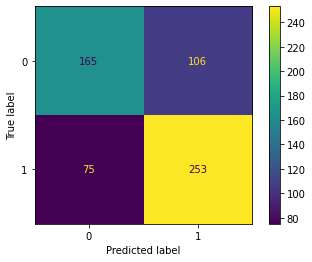

In [73]:
ConfusionMatrixDisplay(cm).plot()

In [95]:
accuracy_score(df_prune_min_test["pregnant"].values, res)  

0.6978297161936561

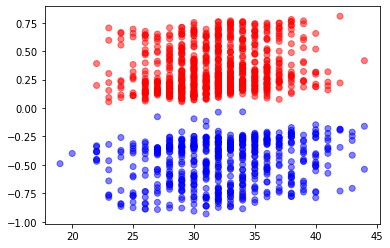

In [89]:
colors = np.full(len(df_prune_min_train), 'blue')
colors[df_prune_min_train["pregnant"]] = 'red'
plt.scatter(x=df_prune_min_train["age"].values, y=result_prune_min.resid_response, color=colors, alpha=0.5)

In [108]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=0)
forest.fit(df_onehot, df_ana["pregnant"])

RandomForestClassifier(random_state=0)

Text(0, 0.5, 'Mean decrease in impurity')

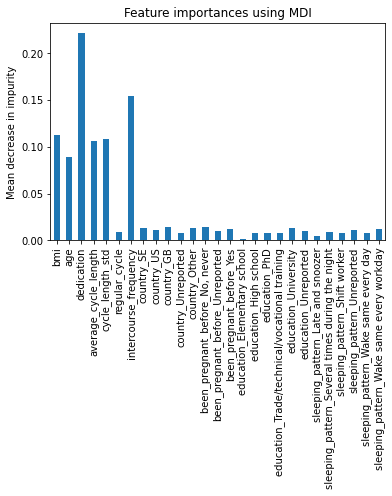

In [113]:
importances = forest.feature_importances_
forest_importances = pd.Series(importances, index=df_onehot.columns)
#std = np.std([t.feature_importances_ for t in forest.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")